# Figure 3B Inputs to the oviINr Region Breakdwon based on known versus generic celltypes
Written by Rhessa Weber Langstaff \
\
We used the nomenclature presented in Scheffer et al., "A connectome and analysis of the adult Drosophila central brain"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuprint import Client
import matplotlib.patheffects as path_effects
import matplotlib as mpl
import bokeh
import bokeh.palettes

from neuprint import fetch_simple_connections, fetch_synapse_connections, NeuronCriteria as NC


auth_token_file = open("flybrain.auth.txt", 'r')
auth_token = next(auth_token_file).strip()
try:
    np_client = Client('neuprint.janelia.org', dataset='hemibrain:' + 'v1.2.1', token=auth_token)
except:
    np_client = None

# Body Ids of oviINs
oviINr= 423101189
oviINl= 485934965
# inputs to the oviINr
ovi_inputs = fetch_simple_connections(None, oviINr)

# import modularity data
mod = pd.read_csv('oviIN/preprocessed_inputs-v1.2.1/preprocessed_nodes.csv')
mod

id   key  0.0  0.05  0.1  0.5  0.75  1.0   instance celltype  \
0     1003215282     1    1     1    1    1     1    1    CL229_R    CL229   
1     1005952640     2    2     1    1    2     2    2    IB058_R    IB058   
2     1006928515     3    1     1    1    3     3    3    CL300_R    CL300   
3     1007260806     4    2     1    1    4     4    4    CL301_R    CL301   
4     1008024276     5    3     2    2    5     5    5     FB5N_R     FB5N   
...          ...   ...  ...   ...  ...  ...   ...  ...        ...      ...   
2506   987273073  2507    3     8    8  409   604  629  (PVL05)_L      NaN   
2507   987842109  2508    3     9   23  533   780  815        NaN      NaN   
2508   988567837  2509    2     3    4   16    58   63     FB4G_R     FB4G   
2509   988909130  2510    2     3    4  389   559  572     FB5V_R     FB5V   
2510   989228019  2511    2     3    4  389   559  572     FB5V_R     FB5V   

      ...  status  cropped      statusLabel  cellBodyFiber  somaRadius  \
0     ...  Traced    False   Roughly traced          PDM19       301.0   
1     ...  Traced    False   Roughly traced          PVL20         NaN   
2     ...  Traced    False   Roughly traced          PVL13       236.0   
3     ...  Traced    False   Roughly traced          PVL13       236.0   
4     ...  Traced    False   Roughly traced          AVM08       472.5   
...   ...     ...      ...              ...            ...         ...   
2506  ...  Traced    False   Roughly traced            NaN         NaN   
2507  ...  Orphan      NaN  Orphan hotknife            NaN         NaN   
2508  ...  Traced    False   Roughly traced          AVM08         NaN   
2509  ...  Traced    False   Roughly traced          AVM10       296.5   
2510  ...  Traced    False   Roughly traced          AVM10       296.5   

               somaLocation  \
0     [23044, 14981, 11600]   
1                       NaN   
2     [12083, 10523, 16816]   
3     [13524, 10108, 16480]   
4     [19178, 29711, 37312]   
...                     ...   
2506                    NaN   
2507                    NaN   
2508                    NaN   
2509  [13226, 32024, 18600]   
2510  [12516, 33587, 18648]   

                                                roiInfo        notes  \
0     {'INP': {'pre': 87, 'post': 351, 'downstream':...          NaN   
1     {'INP': {'pre': 464, 'post': 1327, 'downstream...          NaN   
2     {'INP': {'pre': 79, 'post': 126, 'downstream':...          NaN   
3     {'INP': {'pre': 40, 'post': 128, 'downstream':...          NaN   
4     {'SNP(L)': {'post': 5, 'upstream': 5, 'mito': ...  SMPCREFB5_4   
...                                                 ...          ...   
2506  {'SNP(R)': {'pre': 65, 'post': 52, 'downstream...          NaN   
2507  {'SNP(R)': {'pre': 2, 'post': 13, 'downstream'...          NaN   
2508  {'SNP(R)': {'pre': 6, 'post': 73, 'downstream'...  CRELALFB4_3   
2509  {'SNP(R)': {'pre': 1, 'post': 28, 'downstream'...    CRELALFB5   
2510  {'SNP(R)': {'pre': 1, 'post': 45, 'downstream'...    CRELALFB5   

                                              inputRois  \
0     ['EPA(R)', 'GOR(R)', 'IB', 'ICL(R)', 'INP', 'S...   
1     ['ATL(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...   
2     ['ATL(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...   
3     ['GOR(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...   
4     ['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...   
...                                                 ...   
2506  ['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...   
2507                               ['SMP(R)', 'SNP(R)']   
2508  ['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...   
2509  ['AB(R)', 'CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX',...   
2510  ['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...   

                                             outputRois  
0     ['GOR(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...  
1     ['ATL(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...  
2     ['ATL(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...  
3     ['I

In [2]:
# Region Breakdown
mod

id   key  0.0  0.05  0.1  0.5  0.75  1.0   instance celltype  \
0     1003215282     1    1     1    1    1     1    1    CL229_R    CL229   
1     1005952640     2    2     1    1    2     2    2    IB058_R    IB058   
2     1006928515     3    1     1    1    3     3    3    CL300_R    CL300   
3     1007260806     4    2     1    1    4     4    4    CL301_R    CL301   
4     1008024276     5    3     2    2    5     5    5     FB5N_R     FB5N   
...          ...   ...  ...   ...  ...  ...   ...  ...        ...      ...   
2506   987273073  2507    3     8    8  409   604  629  (PVL05)_L      NaN   
2507   987842109  2508    3     9   23  533   780  815        NaN      NaN   
2508   988567837  2509    2     3    4   16    58   63     FB4G_R     FB4G   
2509   988909130  2510    2     3    4  389   559  572     FB5V_R     FB5V   
2510   989228019  2511    2     3    4  389   559  572     FB5V_R     FB5V   

      ...  status  cropped      statusLabel  cellBodyFiber  somaRadius  \
0     ...  Traced    False   Roughly traced          PDM19       301.0   
1     ...  Traced    False   Roughly traced          PVL20         NaN   
2     ...  Traced    False   Roughly traced          PVL13       236.0   
3     ...  Traced    False   Roughly traced          PVL13       236.0   
4     ...  Traced    False   Roughly traced          AVM08       472.5   
...   ...     ...      ...              ...            ...         ...   
2506  ...  Traced    False   Roughly traced            NaN         NaN   
2507  ...  Orphan      NaN  Orphan hotknife            NaN         NaN   
2508  ...  Traced    False   Roughly traced          AVM08         NaN   
2509  ...  Traced    False   Roughly traced          AVM10       296.5   
2510  ...  Traced    False   Roughly traced          AVM10       296.5   

               somaLocation  \
0     [23044, 14981, 11600]   
1                       NaN   
2     [12083, 10523, 16816]   
3     [13524, 10108, 16480]   
4     [19178, 29711, 37312]   
...                     ...   
2506                    NaN   
2507                    NaN   
2508                    NaN   
2509  [13226, 32024, 18600]   
2510  [12516, 33587, 18648]   

                                                roiInfo        notes  \
0     {'INP': {'pre': 87, 'post': 351, 'downstream':...          NaN   
1     {'INP': {'pre': 464, 'post': 1327, 'downstream...          NaN   
2     {'INP': {'pre': 79, 'post': 126, 'downstream':...          NaN   
3     {'INP': {'pre': 40, 'post': 128, 'downstream':...          NaN   
4     {'SNP(L)': {'post': 5, 'upstream': 5, 'mito': ...  SMPCREFB5_4   
...                                                 ...          ...   
2506  {'SNP(R)': {'pre': 65, 'post': 52, 'downstream...          NaN   
2507  {'SNP(R)': {'pre': 2, 'post': 13, 'downstream'...          NaN   
2508  {'SNP(R)': {'pre': 6, 'post': 73, 'downstream'...  CRELALFB4_3   
2509  {'SNP(R)': {'pre': 1, 'post': 28, 'downstream'...    CRELALFB5   
2510  {'SNP(R)': {'pre': 1, 'post': 45, 'downstream'...    CRELALFB5   

                                              inputRois  \
0     ['EPA(R)', 'GOR(R)', 'IB', 'ICL(R)', 'INP', 'S...   
1     ['ATL(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...   
2     ['ATL(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...   
3     ['GOR(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...   
4     ['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...   
...                                                 ...   
2506  ['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...   
2507                               ['SMP(R)', 'SNP(R)']   
2508  ['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...   
2509  ['AB(R)', 'CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX',...   
2510  ['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...   

                                             outputRois  
0     ['GOR(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...  
1     ['ATL(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...  
2     ['ATL(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...  
3     ['I

In [3]:
# Import roi data
roi_df = pd.read_excel('all_roi_df.xlsx')
roi_super = roi_df['Super'].dropna()
roi_supersplit = roi_df['Super_split'].dropna()
roi_df

Super Super_split          L1          L2   L3   L4      Color  \
0            AL       AL(L)       AL(L)         NaN  NaN  NaN  cadetblue   
1            AL         NaN         NaN     AL-D(L)  NaN  NaN        NaN   
2            AL         NaN         NaN   AL-DA2(L)  NaN  NaN        NaN   
3            AL         NaN         NaN   AL-DA3(L)  NaN  NaN        NaN   
4            AL         NaN         NaN  AL-DA4m(L)  NaN  NaN        NaN   
..          ...         ...         ...         ...  ...  ...        ...   
225        VMNP         NaN         NaN      VES(L)  NaN  NaN        NaN   
226        VMNP         NaN         NaN      VES(R)  NaN  NaN        NaN   
227          AL       AL(L)     mALT(L)     mALT(L)  NaN  NaN  cadetblue   
228          AL       AL(R)     mALT(R)     mALT(R)  NaN  NaN  cadetblue   
229  NotPrimary  NotPrimary  NotPrimary  NotPrimary  NaN  NaN       navy   

        Color2  
0          NaN  
1    cadetblue  
2    cadetblue  
3    cadetblue  
4    cadetblue  
..         ...  
225  firebrick  
226  firebrick  
227        NaN  
228        NaN  
229        NaN  

[230 rows x 8 columns]

In [4]:
# reads all bodyIds in connectome (fetch_synaptic_connections)
ids = mod['id']
roi_info = fetch_synapse_connections(NC(bodyId=ids), NC(bodyId=423101189), batch_size=1000)
roi_info

  0%|          | 0/21608 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

bodyId_pre  bodyId_post roi_pre roi_post  x_pre  y_pre  z_pre  x_post  \
0       699363923    423101189  SMP(R)   SMP(R)  18710  34066  11978   18714   
1       699363923    423101189  SMP(R)   SMP(R)  22445  25222  10972   22414   
2       699363923    423101189  SMP(R)   SMP(R)  22609  32249  11168   22598   
3       699358695    423101189  SMP(R)   SMP(R)  23605  19671  12076   23607   
4       699358695    423101189  SMP(R)   SMP(R)  21837  24629  12812   21852   
...           ...          ...     ...      ...    ...    ...    ...     ...   
21603  1875284107    423101189  VES(R)   VES(R)  22272  23848  29541   22261   
21604  1844249219    423101189      IB       IB  25286  16199  21709   25311   
21605  1844249219    423101189  VES(R)   VES(R)  22038  21037  28943   22057   
21606  1848000962    423101189  VES(R)   VES(R)  23349  21550  26101   23335   
21607  1848000962    423101189  VES(R)   VES(R)  23459  21584  26023   23483   

       y_post  z_post  confidence_pre  confidence_post  
0       34056   11998           0.836         0.462087  
1       25228   10973           0.994         0.456265  
2       32226   11165           0.996         0.895489  
3       19654   12075           0.811         0.844000  
4       24648   12828           0.941         0.844886  
...       ...     ...             ...              ...  
21603   23861   29557           0.933         0.854542  
21604   16190   21743           0.752         0.604000  
21605   21047   28964           0.937         0.425953  
21606   21569   26106           0.817         0.993132  
21607   21593   26021           0.884         0.934000  

[21608 rows x 12 columns]

In [5]:
# Drop all unnecessary columns
roi_info_small = roi_info[['bodyId_pre', 'roi_pre', 'bodyId_post', 'roi_post']]
# Collapse on roi_post and count the number of synapses in a new column called weight
roi_info_grouped = roi_info_small.groupby(['roi_post', 'bodyId_pre']).size().reset_index(name='weight')

# rename roi_post to roi
roi_info_grouped = roi_info_grouped.rename(columns = {'roi_post':'roi', 'bodyId_pre':'bodyId'})

# mergo onto modularity data
inputs_roi = pd.merge(mod, roi_info_grouped, left_on='id', right_on='bodyId', how='inner')
inputs_roi

id   key  0.0  0.05  0.1  0.5  0.75  1.0   instance celltype  \
0     1003215282     1    1     1    1    1     1    1    CL229_R    CL229   
1     1005952640     2    2     1    1    2     2    2    IB058_R    IB058   
2     1006928515     3    1     1    1    3     3    3    CL300_R    CL300   
3     1007260806     4    2     1    1    4     4    4    CL301_R    CL301   
4     1008024276     5    3     2    2    5     5    5     FB5N_R     FB5N   
...          ...   ...  ...   ...  ...  ...   ...  ...        ...      ...   
3496   987273073  2507    3     8    8  409   604  629  (PVL05)_L      NaN   
3497   987842109  2508    3     9   23  533   780  815        NaN      NaN   
3498   988567837  2509    2     3    4   16    58   63     FB4G_R     FB4G   
3499   988909130  2510    2     3    4  389   559  572     FB5V_R     FB5V   
3500   989228019  2511    2     3    4  389   559  572     FB5V_R     FB5V   

      ...  cellBodyFiber  somaRadius           somaLocation  \
0     ...          PDM19       301.0  [23044, 14981, 11600]   
1     ...          PVL20         NaN                    NaN   
2     ...          PVL13       236.0  [12083, 10523, 16816]   
3     ...          PVL13       236.0  [13524, 10108, 16480]   
4     ...          AVM08       472.5  [19178, 29711, 37312]   
...   ...            ...         ...                    ...   
3496  ...            NaN         NaN                    NaN   
3497  ...            NaN         NaN                    NaN   
3498  ...          AVM08         NaN                    NaN   
3499  ...          AVM10       296.5  [13226, 32024, 18600]   
3500  ...          AVM10       296.5  [12516, 33587, 18648]   

                                                roiInfo        notes  \
0     {'INP': {'pre': 87, 'post': 351, 'downstream':...          NaN   
1     {'INP': {'pre': 464, 'post': 1327, 'downstream...          NaN   
2     {'INP': {'pre': 79, 'post': 126, 'downstream':...          NaN   
3     {'INP': {'pre': 40, 'post': 128, 'downstream':...          NaN   
4     {'SNP(L)': {'post': 5, 'upstream': 5, 'mito': ...  SMPCREFB5_4   
...                                                 ...          ...   
3496  {'SNP(R)': {'pre': 65, 'post': 52, 'downstream...          NaN   
3497  {'SNP(R)': {'pre': 2, 'post': 13, 'downstream'...          NaN   
3498  {'SNP(R)': {'pre': 6, 'post': 73, 'downstream'...  CRELALFB4_3   
3499  {'SNP(R)': {'pre': 1, 'post': 28, 'downstream'...    CRELALFB5   
3500  {'SNP(R)': {'pre': 1, 'post': 45, 'downstream'...    CRELALFB5   

                                              inputRois  \
0     ['EPA(R)', 'GOR(R)', 'IB', 'ICL(R)', 'INP', 'S...   
1     ['ATL(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...   
2     ['ATL(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...   
3     ['GOR(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...   
4     ['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...   
...                                                 ...   
3496  ['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...   
3497                               ['SMP(R)', 'SNP(R)']   
3498  ['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...   
3499  ['AB(R)', 'CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX',...   
3500  ['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...   

                                             outputRois     roi      bodyId  \
0     ['GOR(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...      IB  1003215282   
1     ['ATL(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...      IB  1005952640   
2     ['ATL(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...      IB  1006928515   
3     ['IB', 'ICL(R)', 'INP', 'PLP(R)', 'SCL(R)', 'S...  SPS(R)  1007260806   
4     ['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...  CRE(R)  1008024276   
...                                                 ...     ...         ...   
3496  ['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...  CRE(R)   987273073   
3497                               ['SMP(R)', 'SNP(R)']  SMP(R)   987842109   
3498  ['CRE(-ROB,-RUB)(R)', 'CRE(R)

In [6]:
# Filter dataframe to only include the columns needed
inputs_roi_filtered = inputs_roi[['roi','celltype', 'weight']]

# Check for 'None' celltype
#inputs_roi_filtered[inputs_roi_filtered['celltype']=='None']

# Drop the 'None' celltype
inputs_roi_filtered = inputs_roi_filtered[inputs_roi_filtered['celltype']!='None']

inputs_roi_filtered

# group by roi so that the celltypes are in each roi grou that they belong in and sum downstream values
inputs_roi_grouped = inputs_roi_filtered.groupby(['roi', 'celltype'], as_index=False).sum()
inputs_roi_grouped

roi  celltype  weight
0     ATL(R)   AOTU024       1
1     ATL(R)     IB109       1
2     ATL(R)     LC46a       2
3     ATL(R)  SMP018_b       3
4     ATL(R)    SMP327       3
...      ...       ...     ...
1644  VES(R)    oviDNa       1
1645  VES(R)      pC1d      21
1646  VES(R)    v2LN37       3
1647  VES(R)     vpoDN       1
1648  VES(R)     vpoEN       4

[1649 rows x 3 columns]

In [7]:
# Filter out the unknown celltypes
for i in range(len(inputs_roi_grouped)):
    celltype = inputs_roi_grouped['celltype'][i][:3]
    if celltype in ['CRE', 'SMP', 'SIP', 'SLP', 'LAL', 'AOT', 'PLP', 'WED', 'AVL', 'ATL', 'AVL', 'VES', 'SAD']:
        inputs_roi_grouped['celltype'][i] = ''
    elif inputs_roi_grouped['celltype'][i][:2] in [ 'LT', 'CL', 'IB', 'PL', 'PS', 'PV']:
        inputs_roi_grouped['celltype'][i] = ''
    else:
        continue
inputs_roi_grouped

/var/folders/db/q8_kwk2x73df8d997nrf14k1nfx1_b/T/ipykernel_53257/3156857018.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  inputs_roi_grouped['celltype'][i] = ''
/var/folders/db/q8_kwk2x73df8d997nrf14k1nfx1_b/T/ipykernel_53257/315685701

roi celltype  weight
0     ATL(R)                1
1     ATL(R)                1
2     ATL(R)    LC46a       2
3     ATL(R)                3
4     ATL(R)                3
...      ...      ...     ...
1644  VES(R)   oviDNa       1
1645  VES(R)     pC1d      21
1646  VES(R)   v2LN37       3
1647  VES(R)    vpoDN       1
1648  VES(R)    vpoEN       4

[1649 rows x 3 columns]

In [8]:
#map roi to super roi
color_dict = mpl.colormaps['Purples'].resampled(7).reversed()
roi_super_dict = {'SMP(R)': 'SNP', 'SMP(L)': 'SNP', 'SIP(R)': 'SNP', 'SIP(L)': 'SNP', 'VES(R)': 'VMNP', 'LAL(R)': 'LX', 'IB': 'INP', 'CRE(R)': 'INP', 'CRE(L)': 'INP', 'ATL(R)': 'INP', 'ATL(L)': 'AL', 'VES(L)': 'VMNP', 'GOR(R)': 'VMNP', 'GOR(L)': 'VMNP', 'SPS(R)': 'VMNP', 'SPS(L)': 'VMNP', 'FLA(R)': 'PENP', 'FLA(L)': 'PENP', 'PENP': 'PENP', 'AL': 'AL', 'PENP': 'PENP', 'CAN(R)': 'PENP'}
inputs_roi_grouped['super_roi'] = inputs_roi_grouped['roi'].map(roi_super_dict)
color_dict = color_dict([0,1,2,3,4,5,6])

inputs_roi_grouped

roi celltype  weight super_roi
0     ATL(R)                1       INP
1     ATL(R)                1       INP
2     ATL(R)    LC46a       2       INP
3     ATL(R)                3       INP
4     ATL(R)                3       INP
...      ...      ...     ...       ...
1644  VES(R)   oviDNa       1      VMNP
1645  VES(R)     pC1d      21      VMNP
1646  VES(R)   v2LN37       3      VMNP
1647  VES(R)    vpoDN       1      VMNP
1648  VES(R)    vpoEN       4      VMNP

[1649 rows x 4 columns]

In [9]:
# Check unique Roi 
inputs_roi_grouped['super_roi'].unique()
# inner layer sums the super_roi values into a total weight column
inner_layer = inputs_roi_grouped.groupby(['super_roi'], as_index=False).sum()

# drop roi and celltype columns
inner_layer = inner_layer.drop(columns=['roi', 'celltype'])

# map color to super_roi
inner_layer['color'] = 'darkturquoise'
inner_layer

super_roi  weight          color
0       INP    3375  darkturquoise
1        LX    1425  darkturquoise
2      PENP       7  darkturquoise
3       SNP   11531  darkturquoise
4      VMNP     967  darkturquoise

In [10]:
# Outer layer only shows to groups for each super_roi, known and unknown celltypes
# this means each celltypes that has a name will be grouped together and all the blank celltypes will be grouped together
outer_layer = inputs_roi_grouped.copy()
for i in range(len(outer_layer)):
    if outer_layer['celltype'][i] == '':
        outer_layer['celltype'][i] = 'Unknown'
    else:
        outer_layer['celltype'][i] = 'Known'

# group by super_roi and celltype
outer_layer = outer_layer.groupby(['super_roi', 'celltype'], as_index=False).sum()

# Drop roi column
outer_layer = outer_layer.drop(columns=['roi'])
outer_layer

/var/folders/db/q8_kwk2x73df8d997nrf14k1nfx1_b/T/ipykernel_53257/1683018054.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  outer_layer['celltype'][i] = 'Unknown'
/var/folders/db/q8_kwk2x73df8d997nrf14k1nfx1_b/T/ipykernel_53257/168301805

super_roi celltype  weight
0       INP    Known     724
1       INP  Unknown    2651
2        LX    Known     106
3        LX  Unknown    1319
4      PENP  Unknown       7
5       SNP    Known    2304
6       SNP  Unknown    9227
7      VMNP    Known      57
8      VMNP  Unknown     910

In [11]:
# map color to super_roi
outer_layer['color'] = 'orangered'
# change the color to "light"+ color for the unknown celltypes and 'dark'+ color for the known celltypes
for i in range(len(outer_layer)):
    if outer_layer['celltype'][i] == 'Unknown':
        outer_layer['color'][i] = 'darkorange'
outer_layer

/var/folders/db/q8_kwk2x73df8d997nrf14k1nfx1_b/T/ipykernel_53257/1722493927.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  outer_layer['color'][i] = 'darkorange'
/var/folders/db/q8_kwk2x73df8d997nrf14k1nfx1_b/T/ipykernel_53257/172249392

super_roi celltype  weight       color
0       INP    Known     724   orangered
1       INP  Unknown    2651  darkorange
2        LX    Known     106   orangered
3        LX  Unknown    1319  darkorange
4      PENP  Unknown       7  darkorange
5       SNP    Known    2304   orangered
6       SNP  Unknown    9227  darkorange
7      VMNP    Known      57   orangered
8      VMNP  Unknown     910  darkorange

Text(0.5, 0.98, 'Cell Type Breakdown by ROI')

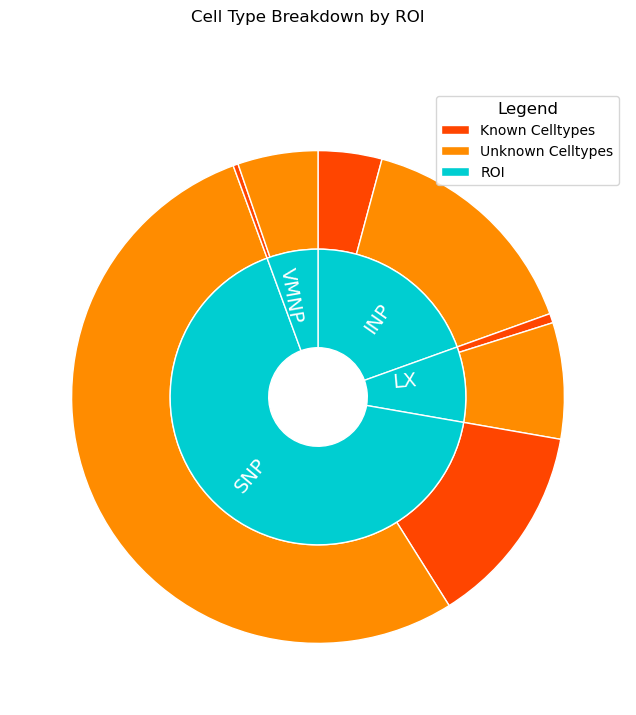

In [12]:
# Filter out the roi that have less than 100 synapses
inner_layer = inner_layer[inner_layer['weight'] >= 10]
outer_layer = outer_layer[outer_layer['weight'] >= 10]

# create a double layered pie plot with the roi as the inner layer and the celltypes as the outer layer
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the outer layer of the pie plot
wedges1, _ = ax.pie(outer_layer['weight'],  colors=outer_layer['color'],radius=1, rotatelabels=True,  startangle=90, counterclock=False, wedgeprops=dict(width=0.4, edgecolor='white'))

# Plot the inner layer of the pie plot
wedges2, _ = ax.pie(inner_layer['weight'], labels=inner_layer['super_roi'], colors= inner_layer['color'],labeldistance=0.5, rotatelabels= True, radius=1-0.4, startangle=90, counterclock=False, wedgeprops=dict(width=0.4, edgecolor='white'), textprops={'fontsize': 14, 'color': 'white'})
    
# legend with orangered, darkorange, darkturquoise corresponding to known celltypes, unknown celltypes, and roi respectively
legend_elements = [mpl.patches.Patch(facecolor='orangered', edgecolor='white', label='Known Celltypes'), mpl.patches.Patch(facecolor='darkorange', edgecolor='white', label='Unknown Celltypes'), mpl.patches.Patch(facecolor='darkturquoise', edgecolor='white', label='ROI')]
ax.legend(handles=legend_elements, loc='upper right', title='Legend', title_fontsize='large', fontsize='medium')

fig.suptitle("Cell Type Breakdown by ROI")


In [ ]:
fig.savefig('manuscript_figs/Figure3B.svg', format='svg')

In [ ]:
fig.savefig('manuscript_figs/Figure3B.pdf', format='pdf')

### Notes
I notice that these are not sorted and it think it would be visually helpful to see that..  might alight with the known types